In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI

c:\Codes\Learning\Lang_graph\venv\Lib\site-packages\langchain_core\_api\deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [ ]:
load_dotenv()

In [3]:
parent_llm = ChatGoogleGenerativeAI(model='gemini-2.5-flash')
subgraph_llm = ChatGoogleGenerativeAI(model='gemini-2.5-flash')

In [4]:

class ParentState(TypedDict):

    question: str
    answer_eng: str
    answer_hin: str

In [5]:
def translate_text(state: ParentState):

    prompt = f"""
Translate the following text to Hindi.
Keep it natural and clear. Do not add extra content.

Text:
{state["answer_eng"]}
""".strip()
    
    translated_text = subgraph_llm.invoke(prompt).content

    return {'answer_hin': translated_text}

In [6]:

subgraph_builder = StateGraph(ParentState)

subgraph_builder.add_node('translate_text', translate_text)

subgraph_builder.add_edge(START, 'translate_text')
subgraph_builder.add_edge('translate_text', END)

subgraph = subgraph_builder.compile()

In [7]:
def generate_answer(state: ParentState):

    answer = parent_llm.invoke(f"You are a helpful assistant. Answer clearly.\n\nQuestion: {state['question']}").content
    return {'answer_eng': answer}

In [8]:
parent_builder = StateGraph(ParentState)

parent_builder.add_node("answer", generate_answer)
parent_builder.add_node("translate", subgraph)

parent_builder.add_edge(START, 'answer')
parent_builder.add_edge('answer', 'translate')
parent_builder.add_edge('translate', END)

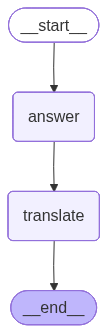

In [9]:
graph = parent_builder.compile()

graph

In [10]:

graph.invoke({'question': 'What is quantum physics'})

{'question': 'What is quantum physics',
 'answer_eng': 'Quantum physics, also known as **quantum mechanics**, is a fundamental branch of physics that describes the behavior of matter and energy at the smallest scales: that of atoms and subatomic particles (like electrons, protons, and photons).\n\nIt\'s a revolutionary theory because it reveals that the rules governing the universe at this tiny level are dramatically different from the "classical physics" (like Newton\'s laws) that describe the world we experience every day.\n\nHere are the key ideas that define quantum physics:\n\n1.  **Quantization:** Energy, light, and matter don\'t exist in continuous, smooth values but rather in discrete, indivisible packets called "quanta." For example, light comes in packets called photons, and electrons in an atom can only occupy specific energy levels, not anything in between. Think of a staircase instead of a ramp.\n\n2.  **Wave-Particle Duality:** Particles (like electrons or even atoms) can